<a href="https://colab.research.google.com/github/KatrielCarvalho/PROJETO_ALURA_G.A.I.A/blob/main/GraficoPorImagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Intalação do SDK**

---




In [59]:
!pip install -q -U google-generativeai

### **Importações** 📝


---



In [ ]:
#Importações para o Gemini
import pathlib as Path
import google.generativeai as genai
genai.configure(api_key="YOUR_API_KEY")

#Importações para os gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

#Importação de pausas
import time

### **Geração** ⚙

---



In [ ]:
#Configurações do Gemini
generation_config = {
    "candidate_count": 1,
    "temperature": 0
}

#Segurança
safety_settings = {

    "HARASSMENT": "BLOCK_LOW_AND_ABOVE",
    "HATE": "BLOCK_LOW_AND_ABOVE",
    "SEXUAL": "BLOCK_LOW_AND_ABOVE",
    "DANGEROUS": "BLOCK_LOW_AND_ABOVE"

}

###**Criando o Modelo** 🔧


---



In [ ]:
model = genai.GenerativeModel(model_name = "gemini-1.5-pro-latest",
                                generation_config = generation_config,
                                safety_settings = safety_settings)

#Apurando as respostas para a forma que queremos
chat = model.start_chat(history = [
    {
    "role": "user",
    "parts": ["Quais itens estão nessa imagem?\n\nResposta: Bola de Basquete\n\n"]
    },

    {
    "role": "user",
    "parts": ["Quais itens estão nessa imagem?\n\nResposta: Bicicleta\n\n"]
    },
    {
    "role": "user",
    "parts": ["Quais itens estão nessa imagem?\n\nResposta: Carro\n\n"]
    },
    {
    "role": "user",
    "parts": ["Quais itens estão nessa imagem?\n\nResposta: Caderno, Caneta\n\n"]
    }

])

### **Analise das imagens** 🧮




---



*Analise dos objetos*

In [ ]:
def BarrasX(file):
    i=0
    first = True
    prompt = genai.upload_file(file), "Informe os itens presente nessa imagem, separados por virgula"
    time.sleep(2)
    response = chat.send_message(prompt)
    X = []

    while response.text.find(",", i) != -1:
        if first:
            X.append(response.text[i : response.text.find(",", i)])
            first = False
        else:
            X.append(response.text[i+1 : response.text.find(",", i)])
        i = response.text.find(",", i) + 1

    X.append(response.text[i+1 : len(response.text)])


    return X

*Analise da quantidade de cada um dos objetos*

In [ ]:
def BarrasY():
  i=0
  Y = []
  prompt = "Informe apenas o numero da quantidade de cada item respectivamente, sem espaços entre as virgulas."
  time.sleep(2)
  response = chat.send_message(prompt)
  j=0
  while response.text.find(",", i) != -1:
      Y.append(response.text[i : response.text.find(",", i)])
      i = response.text.find(",", i) + 1
      Y[j] = int(Y[j])
      j+=1

  Y.append(response.text[i : len(response.text)])
  Y[j] = int(Y[j])

  return Y

Inserindo a Imagem a ser analisada

In [ ]:
files = input("Insira a sua imagem: ")
X = BarrasX(files)
Y = BarrasY()

Insira a sua imagem: /content/AA.jpeg


### **Criando o Gráfico** : 📊

---



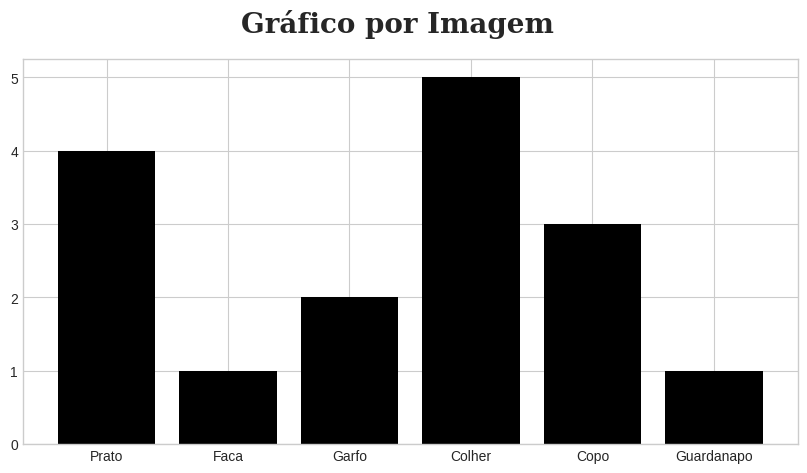

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use(['seaborn-v0_8-whitegrid','tableau-colorblind10'])
fig, axes = plt.subplots(figsize=(10,5))
plt.subplots_adjust(hspace=1)

fig.suptitle('Gráfico por Imagem', fontsize=20, fontweight='bold', family='serif')
axes.bar(X, Y, color = 'black')

#Mostrar o Grafico
plt.show()

